<a href="https://colab.research.google.com/github/joshi-krutika/NLP-Web-Scraping/blob/main/Final_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General dependencies

In [ ]:
!pip install --user spacy~=3.0 catalogue~=2.0

In [ ]:
!pip install --user https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1.tar.gz

In [ ]:
!pip install bs4

In [ ]:
!pip install pandas

#Web Scraping

### Importing dependencies

In [2]:
import csv
import pandas as pd
import requests
import urllib.request
from bs4 import BeautifulSoup
import spacy
nlp = spacy.load('en_core_web_sm')

### Scraping

In [126]:
url = "https://www.linkedin.com/pulse/technology-trends-predictions-2024-wind-is-qcqyf/"

In [127]:
html = urllib.request.urlopen(url)

In [128]:
htmlParse = BeautifulSoup(html, 'html.parser')

In [129]:
htmlParse

<!DOCTYPE html>

<html class="cls-fix-enabled" lang="en">
<head>
<meta content="d_flagship2_pulse_read" name="pageKey"/>
<!-- --><!-- --> <meta content="en_US" name="locale"/>
<meta data-app-version="0.0.2920" data-browser-id="f1010098-153b-4cf2-837f-3b79048fa15f" data-call-tree-id="AAYMTW4oarW2wwRHTeMERg==" data-disable-jsbeacon-pagekey-suffix="false" data-enable-page-view-heartbeat-tracking="" data-logout-url="https://www.linkedin.com/uas/logout?session_full_logout=true&amp;csrfToken=ajax%3A1022069337577712212" data-member-id="0" data-multiproduct-name="article-ssr-frontend" data-page-instance="urn:li:page:d_flagship2_pulse_read;MDsLmI/PTim/7GzlMGNXSQ==" data-service-name="article-ssr-frontend" data-theme="light" id="config"/>
<link href="https://www.linkedin.com/pulse/technology-trends-predictions-2024-wind-is-qcqyf" rel="canonical"/>
<!-- --><!-- -->
<!-- -->
<!-- -->
<!-- -->
<!-- -->
<link href="https://static.licdn.com/aero-v1/sc/h/al2o9zrvru7aqj8e1x2rzsrca" rel="icon"/>
<script

In [130]:
for para in htmlParse.find_all(["p"]):
    print(para.get_text())


                Agree & Join LinkedIn
              

                By clicking Continue, you agree to LinkedIn’s User Agreement, Privacy Policy, and Cookie Policy.
              
The ongoing digital transformation continues to revolutionize our world, and we can expect breakthrough advancements to reshape our lives in exciting ways. 
In this edition, we explore the game-changing trends and their impact.
1- Everyday Automation using Generative AI.
As generative AI becomes more integrated into our daily applications, from search engines to office software, design packages, and communication tools, people will come to understand its potential. 
It acts as a super-smart personal assistant, enhancing efficiency, productivity, and speed. By relying on AI for routine tasks such as information gathering, scheduling, compliance management, and project structuring, individuals will have more time to leverage their unique human skills. 
This shift will enable creativity, exploration of new id

In [131]:
parsed_text_list = []

for para in htmlParse.find_all(["p"]):
    parsed_text_list.append(para.get_text())

In [132]:
parsed_text_list

['\n                Agree & Join LinkedIn\n              ',
 '\n                By clicking Continue, you agree to LinkedIn’s User Agreement, Privacy Policy, and Cookie Policy.\n              ',
 'The ongoing digital transformation continues to revolutionize our world, and we can expect breakthrough advancements to reshape our lives in exciting ways. ',
 'In this edition, we explore the game-changing trends and their impact.',
 '1- Everyday Automation using Generative AI.',
 'As generative AI becomes more integrated into our daily applications, from search engines to office software, design packages, and communication tools, people will come to understand its potential. ',
 'It acts as a super-smart personal assistant, enhancing efficiency, productivity, and speed. By relying on AI for routine tasks such as information gathering, scheduling, compliance management, and project structuring, individuals will have more time to leverage their unique human skills. ',
 'This shift will enable

In [133]:
parsed_text = ""

for para in htmlParse.find_all("p"):
    #parsed_text_str += str(para.get_text())
    parsed_text = " ".join((parsed_text, str(para.get_text())))

In [134]:
parsed_text

' \n                Agree & Join LinkedIn\n               \n                By clicking Continue, you agree to LinkedIn’s User Agreement, Privacy Policy, and Cookie Policy.\n               The ongoing digital transformation continues to revolutionize our world, and we can expect breakthrough advancements to reshape our lives in exciting ways.  In this edition, we explore the game-changing trends and their impact. 1- Everyday Automation using Generative AI. As generative AI becomes more integrated into our daily applications, from search engines to office software, design packages, and communication tools, people will come to understand its potential.  It acts as a super-smart personal assistant, enhancing efficiency, productivity, and speed. By relying on AI for routine tasks such as information gathering, scheduling, compliance management, and project structuring, individuals will have more time to leverage their unique human skills.  This shift will enable creativity, exploration of 

In [135]:
for i in nlp(parsed_text).sents:
    print([i])

[ 
                Agree & Join LinkedIn
               
                ]
[By clicking Continue, you agree to LinkedIn’s User Agreement, Privacy Policy, and Cookie Policy.
               ]
[The ongoing digital transformation continues to revolutionize our world, and we can expect breakthrough advancements to reshape our lives in exciting ways.  ]
[In this edition, we explore the game-changing trends and their impact.]
[1- Everyday Automation using Generative AI.]
[As generative AI becomes more integrated into our daily applications, from search engines to office software, design packages, and communication tools, people will come to understand its potential.  ]
[It acts as a super-smart personal assistant, enhancing efficiency, productivity, and speed.]
[By relying on AI for routine tasks such as information gathering, scheduling, compliance management, and project structuring, individuals will have more time to leverage their unique human skills.  ]
[This shift will enable creativity

In [136]:
sentences = [[i] for i in nlp(parsed_text).sents]

In [137]:
sentences

[[ 
                  Agree & Join LinkedIn
                 
                  ],
 [By clicking Continue, you agree to LinkedIn’s User Agreement, Privacy Policy, and Cookie Policy.
                 ],
 [The ongoing digital transformation continues to revolutionize our world, and we can expect breakthrough advancements to reshape our lives in exciting ways.  ],
 [In this edition, we explore the game-changing trends and their impact.],
 [1- Everyday Automation using Generative AI.],
 [As generative AI becomes more integrated into our daily applications, from search engines to office software, design packages, and communication tools, people will come to understand its potential.  ],
 [It acts as a super-smart personal assistant, enhancing efficiency, productivity, and speed.],
 [By relying on AI for routine tasks such as information gathering, scheduling, compliance management, and project structuring, individuals will have more time to leverage their unique human skills.  ],
 [This shi

In [138]:
myheaders = ['sentence']
myvalues = sentences  # Assuming 'sentences' is your list of sentences

filename = 'article_text.csv'

# Open the file in 'utf-8' encoding
with open(filename, 'w', newline='', encoding='utf-8') as myfile:
    writer = csv.writer(myfile)
    writer.writerow(myheaders)
    writer.writerows(myvalues)

In [139]:
df = pd.read_csv("article_text.csv")

In [140]:
df.head()

,sentence
0,\n Agree & Join LinkedIn\n \n
1,"By clicking Continue, you agree to LinkedIn’s User Agreement, Privacy Policy, and Cookie Policy.\n"
2,"The ongoing digital transformation continues to revolutionize our world, and we can expect breakthrough advancements to reshape our lives in exciting ways."
3,"In this edition, we explore the game-changing trends and their impact."
4,1- Everyday Automation using Generative AI.


#Text Summary

### Importing dependencies

In [141]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [142]:
# !unzip glove*.zip

In [143]:
import pandas as pd
import numpy as np

In [144]:
from nltk.tokenize import sent_tokenize

In [145]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
from sklearn.metrics.pairwise import cosine_similarity

In [147]:
import networkx as nx

In [148]:
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()
len(word_embeddings)

400000

In [149]:
sentences = []
for s in df['sentence']:
  sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x]
print(sentences[:5])

[' \n                Agree & Join LinkedIn', 'By clicking Continue, you agree to LinkedIn’s User Agreement, Privacy Policy, and Cookie Policy.', 'The ongoing digital transformation continues to revolutionize our world, and we can expect breakthrough advancements to reshape our lives in exciting ways.', 'In this edition, we explore the game-changing trends and their impact.', '1- Everyday Automation using Generative AI.']


In [150]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

<ipython-input-150-57e05bf8eb2b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")


In [151]:
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [152]:
stop_words = stopwords.words('english')
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [153]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

In [154]:
sim_mat = np.zeros([len(sentences), len(sentences)])

In [155]:
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [156]:
nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [157]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [158]:
# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])

As generative AI becomes more integrated into our daily applications, from search engines to office software, design packages, and communication tools, people will come to understand its potential.
By relying on AI for routine tasks such as information gathering, scheduling, compliance management, and project structuring, individuals will have more time to leverage their unique human skills.
This shift will enable creativity, exploration of new ideas, original thinking, and meaningful human connections.
Early adopters of quantum technology include banks and financial services organizations seeking to enhance AI systems for fraud detection, risk management, and high-frequency trading.
As cyber threats grow increasingly sophisticated, the competition to develop new solutions leveraging breakthrough technologies like AI intensifies.
As we look ahead to 2024, Wind Is Company remains committed to staying at the forefront of technological advancements and their implications for our clients.


#Word-Relation

### Importing dependencies

In [159]:
from tqdm import tqdm

In [160]:
from spacy.matcher import Matcher

In [161]:
import networkx as nx

In [162]:
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

### Entity-relation

In [163]:
df.sample(5)

,sentence
0,\n Agree & Join LinkedIn\n \n
4,1- Everyday Automation using Generative AI.
27,Join now\n
3,"In this edition, we explore the game-changing trends and their impact."
8,"This shift will enable creativity, exploration of new ideas, original thinking, and meaningful human connections."


In [165]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################

  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text

      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text

      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text

      ## chunk 5
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  # return [ent1.strip(), ent2.strip()]
  return [ent1.strip(), ent2.strip()]


In [166]:
entity_pairs = []

for i in tqdm(df["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 28/28 [00:00<00:00, 93.59it/s]


In [167]:
entity_pairs

[['', ''],
 ['you', 'User Agreement'],
 ['breakthrough  advancements', 'exciting  ways'],
 ['we', 'changing  trends'],
 ['', '1- Generative AI'],
 ['daily communication people', 'potential'],
 ['It', 'personal  efficiency'],
 ['such project individuals', 'human  skills'],
 ['shift', 'new  ideas'],
 ['transformative  impact', 'generative  all'],
 ['resilient development Cyber resilience', 'business  2024'],
 ['focus', 'unforeseen  circumstances'],
 ['physical business locations', 'business functionality'],
 ['integrated machine frameworks', 'comprehensive cyber resilience strategy'],
 ['cyber threats', 'new AI intensifies'],
 ['3- Computing Quantum computers', 'vast quantum calculations'],
 ['Quantum bits', 'traditional  computers'],
 ['Early  adopters', 'financial fraud detection'],
 ['', ''],
 ['72 security percent', 'traditional  2025'],
 ['This', 'new authorization face'],
 ['quantum computing', 'extraterrestrial material life'],
 ['Company', 'technological  clients'],
 ['positive  

In [168]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object
  matcher = Matcher(nlp.vocab)

  #define the pattern
  pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},
            {'POS':'ADJ','OP':"?"}]

  matcher.add("matching_1",[pattern])

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]]

  return(span.text)

In [169]:
get_entities("Hami is a friend of Haziq.")

['Hami', 'Haziq']

In [170]:
get_relation("Hami is a friend of Haziq")

'is'

In [171]:
relations = [get_relation(i) for i in tqdm(df['sentence'])]

100%|██████████| 28/28 [00:00<00:00, 96.63it/s]


In [172]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [173]:
kg_df

,source,target,edge
0,,,Agree
1,you,User Agreement,agree to
2,breakthrough advancements,exciting ways,continues
3,we,changing trends,explore
4,,1- Generative AI,Automation
5,daily communication people,potential,come
6,It,personal efficiency,acts as
7,such project individuals,human skills,have more
8,shift,new ideas,enable
9,transformative impact,generative all,be


In [174]:
G=nx.from_pandas_edgelist(kg_df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

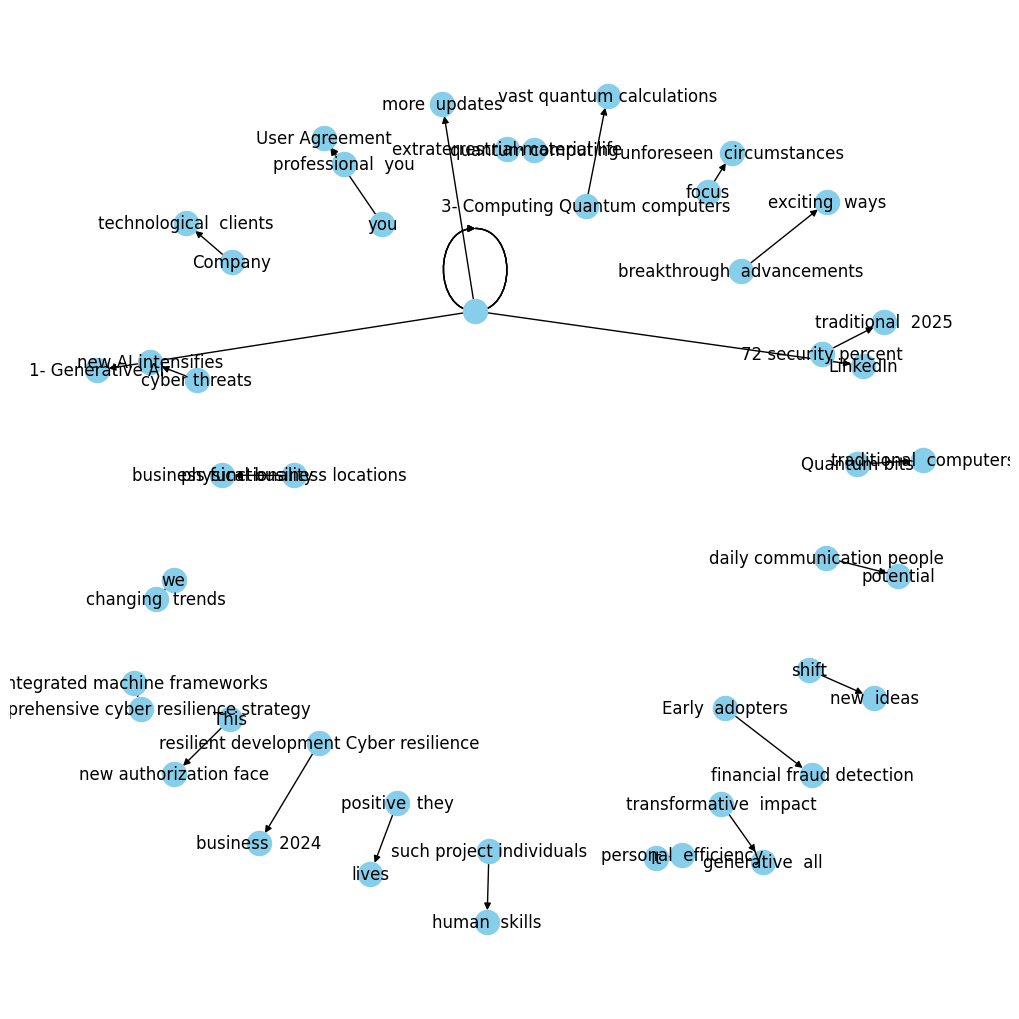

In [175]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()